In [1]:
import wang

import brian2 as b2
from brian2 import NeuronGroup, Synapses, PoissonInput, PoissonGroup, network_operation
from brian2.monitors import StateMonitor, SpikeMonitor, PopulationRateMonitor
from random import sample
import numpy.random as rnd
from neurodynex3.tools import plot_tools
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import time
from datetime import datetime
import pickle
import numpy 

b2.defaultclock.dt = 0.10 * b2.ms

In [2]:
def overlap_rate(data, start, end, trial_num, median_index):
    time = data[0]['time']

    for i in range(trial_num):
        
        plt.plot(time[start:end], data[i]['pop_rate_a'][start:end], 'c', alpha = 0.1, linewidth= 3)
        plt.plot(time[start:end], data[median_index]['pop_rate_a'][start:end], 'k', alpha = 1, linewidth= 1)
        #plt.plot(time, rate_mean, 'b-', label='mean_1', linewidth=0.8)

        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()

The code above has problem because there may be cases where 'pop_rate_a' is not the winner.   

In [11]:
with open('low_rmp_80mV_pop_rate_0812_16_21.pkl', 'rb') as f:
    data_80 = pickle.load(f)

In [8]:
(data_80[:3])


[{'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 7.997e+02, 7.998e+02,
         7.999e+02]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 36.28914252,
         36.28914252, 36.28914252]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.]),
  'stim_info': '100ms to 800ms for 700 ms'},
 {'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 7.997e+02, 7.998e+02,
         7.999e+02]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 22.24173251,
         21.07111501, 19.90049751]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.]),
  'stim_info': '100ms to 800ms for 700 ms'},
 {'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 7.997e+02, 7.998e+02,
         7.999e+02]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 27.50951127,
         27.50951127, 27.50951127]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.]),
  'stim_info': '100ms to 800ms for 700 ms'}]

There are 100 trials in the dictionary data form data_80.  I need to find data structure of 10 trials in the 8x8 matrix data from the heatmap data. 

In [ ]:
with open('low_rmp_80mV_pop_rate_0812_16_21.pkl', 'rb') as f:
    data_80 = pickle.load(f)

In [ ]:
rt_matrix_w_pos_8_by_8_10times_0923_constrast_90

In [10]:
with open('rt_matrix_w_pos_8_by_8_10times_0923_constrast_90.pkl', 'rb') as f:
    data = pickle.load(f)

In [20]:
data_keys = list(data.keys())

In [29]:
data_for_traces = (data[data_keys[40]])

In the data_keys, there are keys in the form of (w_pos, rmp).  From 'data' in the dictionary data format, the population firing rate data can be found from data by putting data[(w_pos, rmp)].  

In [12]:
(data_80[:3])


[{'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 7.997e+02, 7.998e+02,
         7.999e+02]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 36.28914252,
         36.28914252, 36.28914252]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.]),
  'stim_info': '100ms to 800ms for 700 ms'},
 {'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 7.997e+02, 7.998e+02,
         7.999e+02]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 22.24173251,
         21.07111501, 19.90049751]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.]),
  'stim_info': '100ms to 800ms for 700 ms'},
 {'time': array([0.000e+00, 1.000e-01, 2.000e-01, ..., 7.997e+02, 7.998e+02,
         7.999e+02]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 27.50951127,
         27.50951127, 27.50951127]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.]),
  'stim_info': '100ms to 800ms for 700 ms'}]

In [30]:
data_for_traces

[{'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
         1.1999e+03]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 35.70383377,
         35.70383377, 35.70383377]),
  'pop_rate_b': array([0., 0., 0., ..., 0., 0., 0.])},
 {'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
         1.1999e+03]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 38.04506877,
         38.04506877, 35.70383377]),
  'pop_rate_b': array([1.75592625, 1.75592625, 1.75592625, ..., 0.        , 0.        ,
         0.        ])},
 {'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..., 1.1997e+03, 1.1998e+03,
         1.1999e+03]),
  'pop_rate_a': array([ 0.        ,  0.        ,  0.        , ..., 17.55926251,
         17.55926251, 17.55926251]),
  'pop_rate_b': array([0.58530875, 1.1706175 , 1.1706175 , ..., 0.        , 0.        ,
         0.        ])},
 {'time': array([0.0000e+00, 1.0000e-01, 2.0000e-01, ..

In [38]:
def overlap_rates(data, start, end, trial_num):
    time = data[0]['time']

    for i in range(trial_num):
        
        plt.plot(time[start:end], data[i]['pop_rate_a'][start:end], 'c', alpha = 0.3, linewidth= 3)
        #plt.plot(time[start:end], data[median_index]['pop_rate_a'][start:end], 'k', alpha = 1, linewidth= 1)
        #plt.plot(time, rate_mean, 'b-', label='mean_1', linewidth=0.8)

        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()

In [39]:
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")


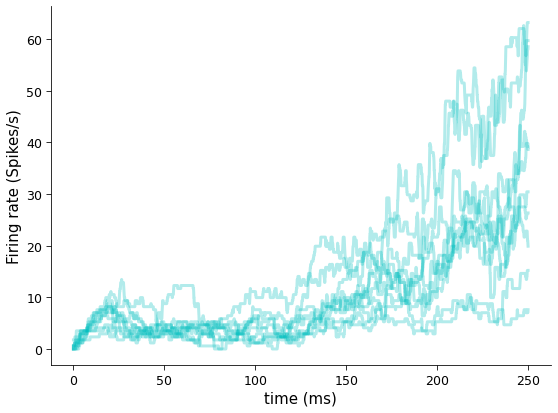

In [43]:
overlap_rates(data_for_traces, 0, 2500, 10)


In [44]:
data_keys[40]

(2.0000000000000004, -70.0)

In [49]:
    
def traces_by_trials(i):
    print(data_keys[i])    
    data_for_traces = (data[data_keys[i]])
    overlap_rates(data_for_traces, 0, 2500, 10)


(1.7000000000000002, -76.0)


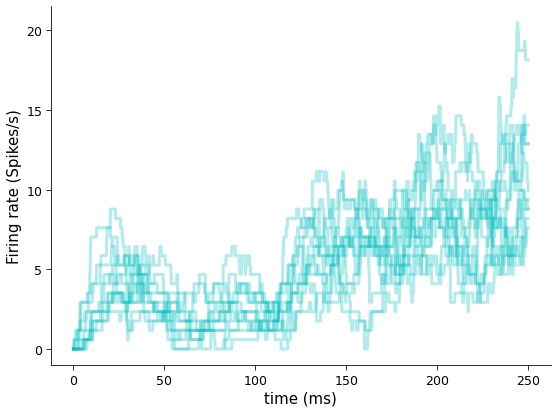

In [53]:
traces_by_trials(20)

In [55]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")
my_layout = widgets.Layout()

In [56]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# @title

# @markdown Make sure you execute this cell to enable the widget!

@widgets.interact(i=widgets.FloatSlider(0., min=1., max=7., step=1.))


def traces_by_trials(i):
    
    int_i =  int(i) * 8 + 3 
    print(data_keys[int_i])    
    data_for_traces = (data[data_keys[int_i]])
    overlap_rates(data_for_traces, 0, 7000, 10)




interactive(children=(FloatSlider(value=1.0, description='i', max=7.0, min=1.0, step=1.0), Output()), _dom_cla…

In [87]:
def traces_by_trials(i):
    
    int_i =  int(i) * 8 + 3 
    print(data_keys[int_i])    
    data_for_traces = (data[data_keys[int_i]])
    overlap_rates(data_for_traces, 0, 7000, 10)

In [108]:
def overlap_compare(ind1, ind2, start, end, trial_num):
    
    
    int_1 =  int(ind1) * 8 + 3 
    print(data_keys[int_1]) 
    
    
    int_2 =  int(ind2) * 8 + 3 
    print(data_keys[int_2]) 
    
    data1 = (data[data_keys[int_1]])
    data2 = (data[data_keys[int_2]])

    
    time = data1[0]['time']
       

    for i in range(trial_num):
        
        plt.plot(time[start:end], data1[i]['pop_rate_a'][start:end], 'c', alpha = 0.3, linewidth= 3)
        plt.plot(time[start:end], data2[i]['pop_rate_a'][start:end], 'm', alpha = 0.3, linewidth= 3)
        #plt.plot(time[start:end], data[median_index]['pop_rate_a'][start:end], 'k', alpha = 1, linewidth= 1)
        #plt.plot(time, rate_mean, 'b-', label='mean_1', linewidth=0.8)

        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()

(1.8000000000000003, -74.5)
(2.2000000000000006, -74.5)


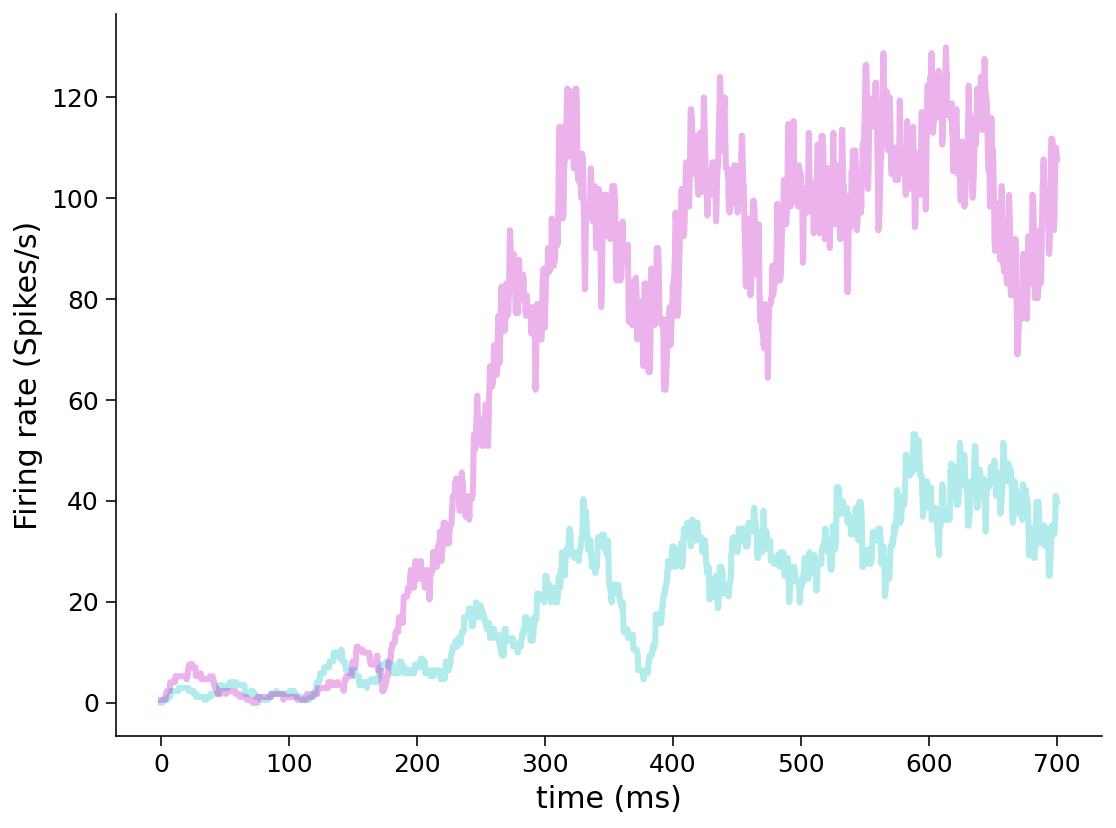

In [112]:
overlap_compare(3,7, 0, 7000, 1)

(1.7000000000000002, -74.5)


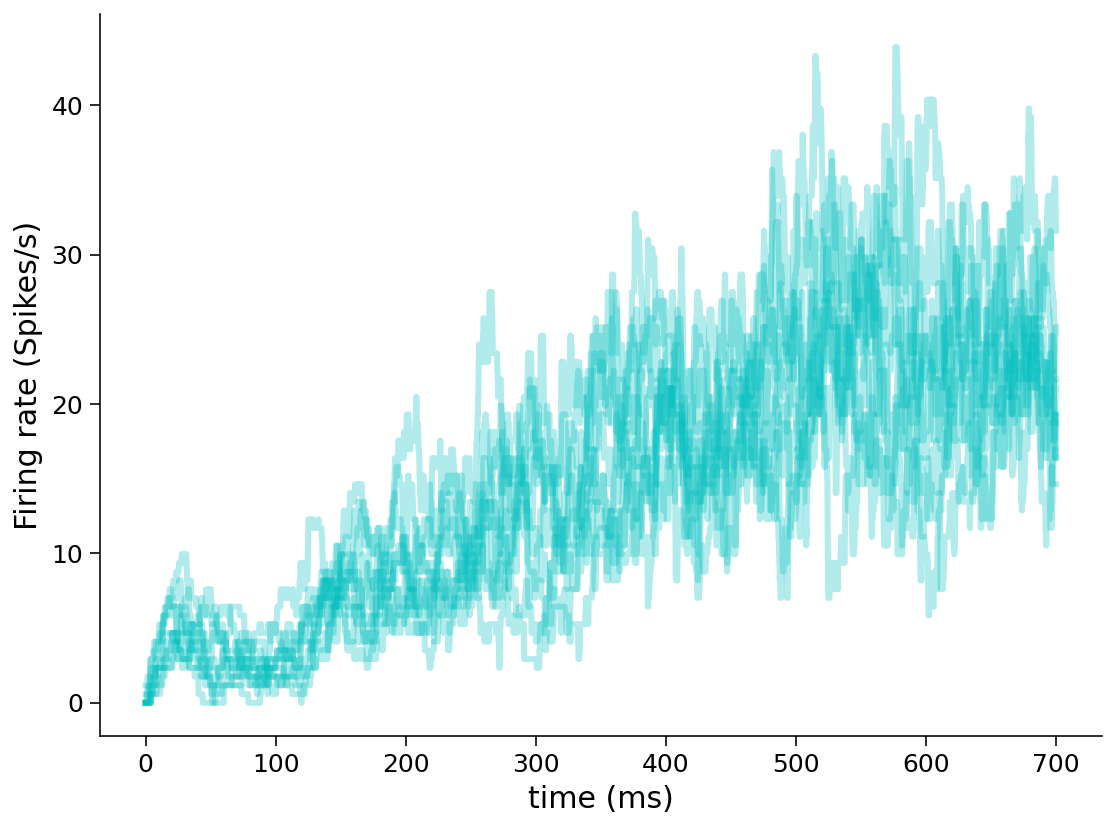

(2.1000000000000005, -74.5)


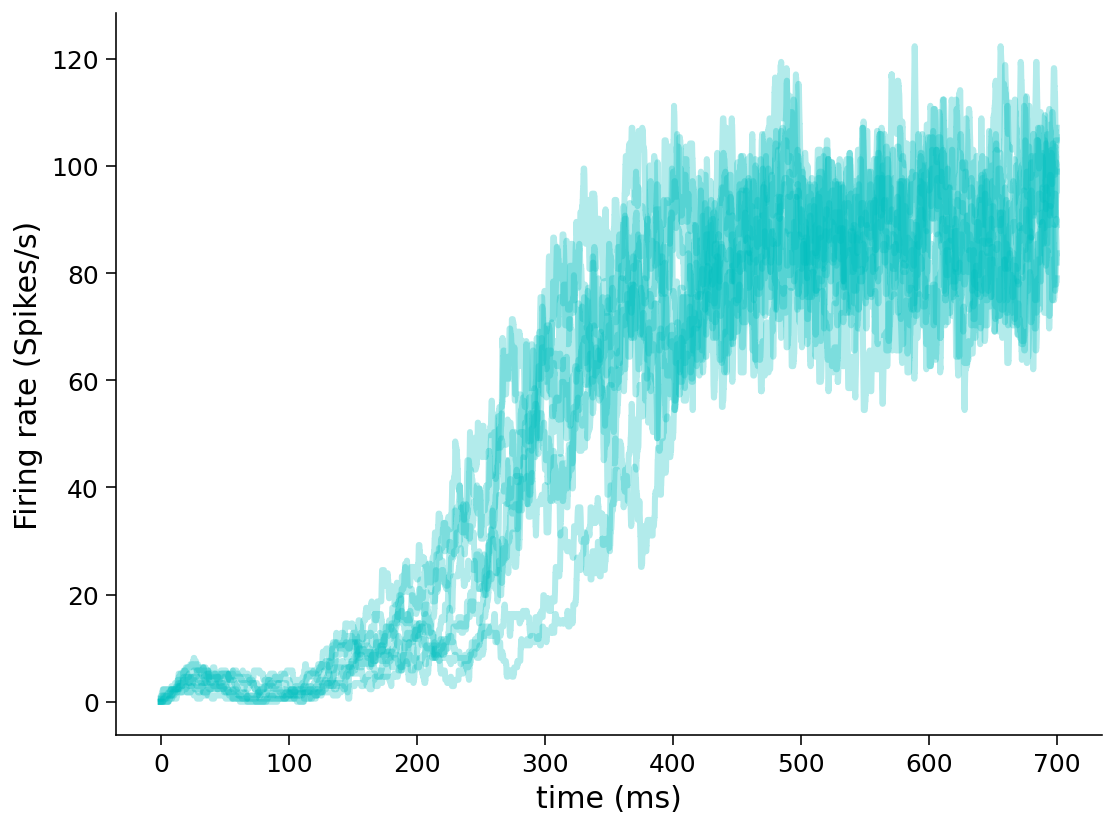

In [94]:
traces_by_trials(2)
traces_by_trials(6)

In [114]:
def overlap_compare_rmp(ind1, ind2, start, end, trial_num):
    
    
    int_1 =  int(ind1) 
    print(data_keys[int_1]) 
    
    
    int_2 =  int(ind2) 
    print(data_keys[int_2]) 
    
    data1 = (data[data_keys[int_1]])
    data2 = (data[data_keys[int_2]])

    
    time = data1[0]['time']
       

    for i in range(trial_num):
        
        plt.plot(time[start:end], data1[i]['pop_rate_a'][start:end], 'c', alpha = 0.3, linewidth= 3)
        plt.plot(time[start:end], data2[i]['pop_rate_a'][start:end], 'm', alpha = 0.3, linewidth= 3)
        #plt.plot(time[start:end], data[median_index]['pop_rate_a'][start:end], 'k', alpha = 1, linewidth= 1)
        #plt.plot(time, rate_mean, 'b-', label='mean_1', linewidth=0.8)

        
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.show()

(1.9000000000000004, -70.0)
(1.9000000000000004, -80.5)


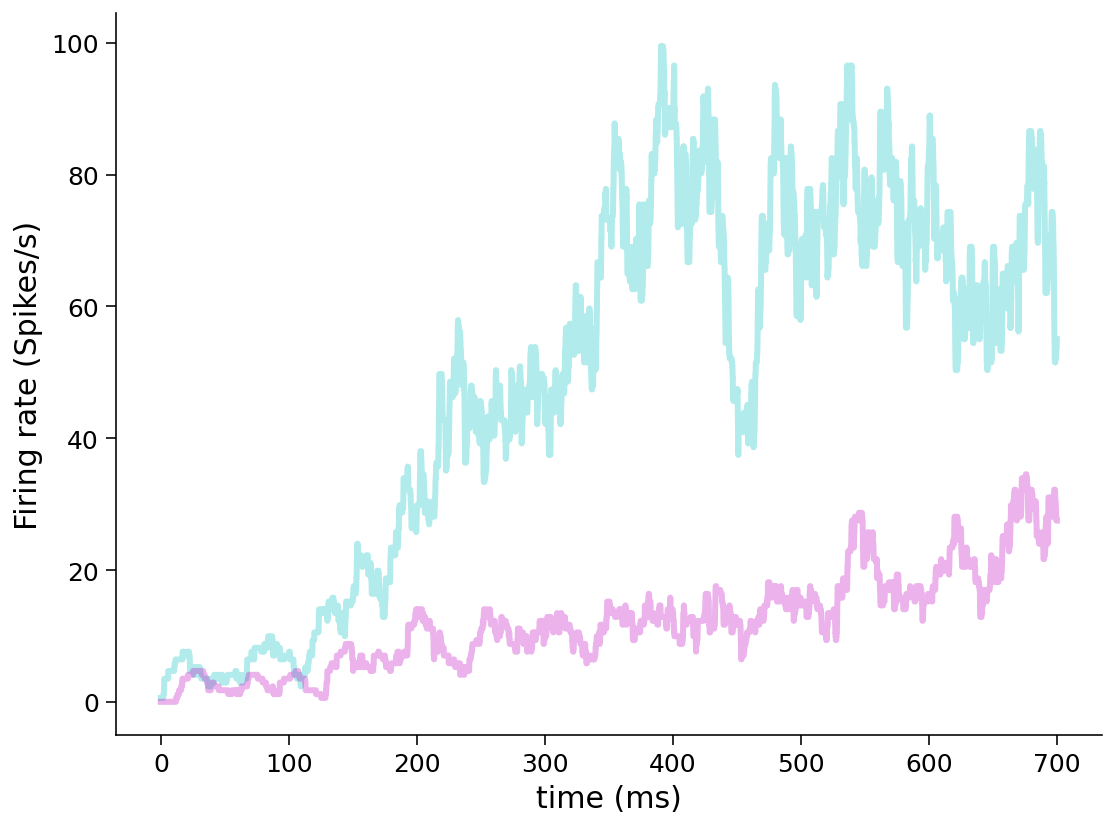

In [131]:
overlap_compare_rmp(32,39, 0, 7000, 1)

(1.7000000000000002, -70.0)
(2.0000000000000004, -70.0)


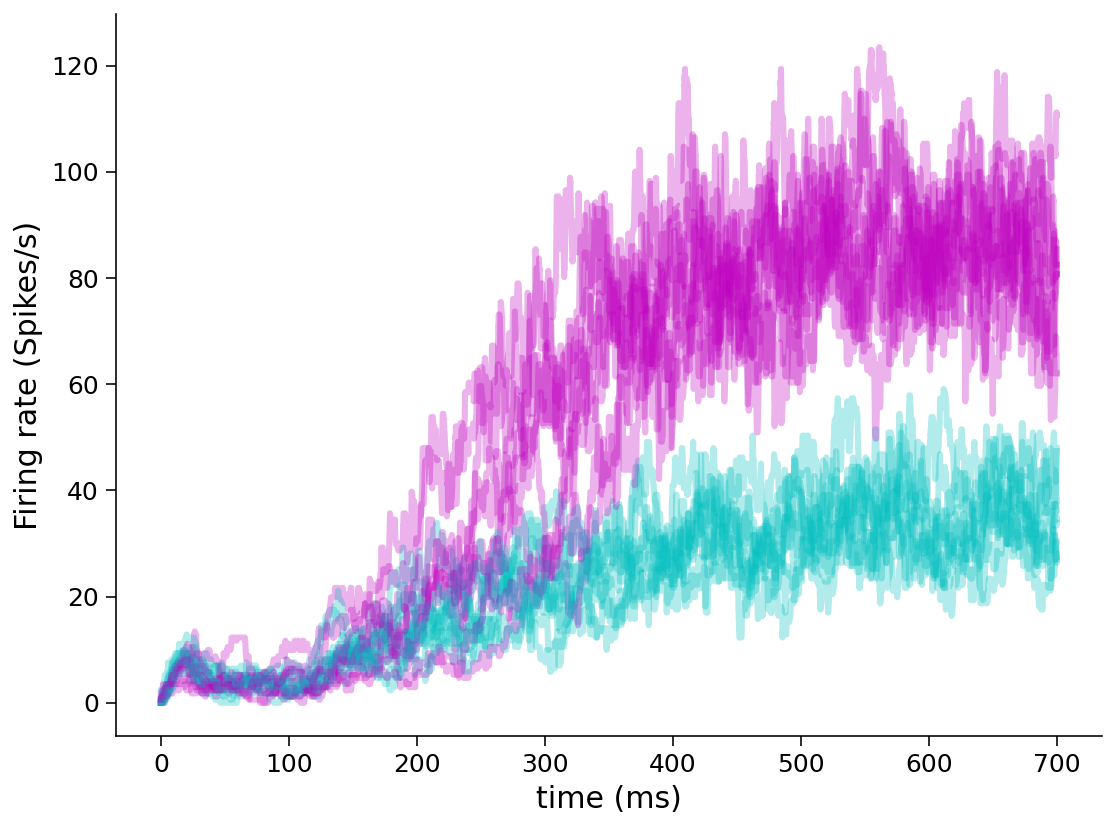

In [137]:
overlap_compare_rmp(16,40, 0, 7000, 10)